# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>

#### Luca Camillini - Luglio 2021

## <span style="color:blue">  Esercitazione 4</span>

In questa esercitazione abbiamo intenzione di simulare la dinamica molecolare. In particolare facciamo tre simulaizoni per i tre stati fisici differenti di un sistema costituito da molecole all'interno di un volume: solido, liquido, gassoso.

Il sistema che simuliamo è un sistema hamiltoniano, obbediente quindi alle seguenti equazioni: 
$$H = \sum_{i}^{3N} \frac{p_{i}^{2}}{2m} + V\left(q_{1},...,q_{3N}\right)$$

$$\dot{q_{i}} = \frac{\partial H\left(\vec{q}, \vec{p}\right)}{\partial p_{i}}$$ $$\dot{p_{i}} = - \frac{\partial H\left(\vec{q}, \vec{p}\right)}{\partial q_{i}}$$

dove la forma del potenziale è di tipo Lennard-Jones (*L-J*). 

### Integrazione numerica - Algoritmo di Verlet

Per simulare la dinamica molecolare abbiamo scelto di usare l'algoritmo di Verlet che consiste nell'espansione in serie di Taylor di $\vec{r}(t)$:
$$\vec{r}(t+\delta t) = \vec{r}(t) + \vec{v}(t)\delta t + \frac{1}{2}\vec{a}(t)\delta t^{2} + \frac{1}{3!}\dot{\vec{a}}(t)\delta t^{3}$$
$$\vec{r}(t-\delta t) = \vec{r}(t) - \vec{v}(t)\delta t + \frac{1}{2}\vec{a}(t)\delta t^{2} - \frac{1}{3!}\dot{\vec{a}}(t)\delta t^{3}$$

sommando le due espansioni le potenze dispari di $\delta t$ si semplificano e si ottiene:
$$\vec{r}(t+\delta t) = 2\vec{r}(t) - \vec{r}(t-\delta t) + \vec{a}(t)\delta t^{2} $$

Osserviamo che:
1. l'algoritmo è simmetrico in $\delta t$,
2. dipende dallo step al tempo $t$ e dallo step precedente. Questo vuol dire che dovremo trovare un'escamotage per il punto di partenza in quanto a $t = 0$ non ci sono $t$ precedenti, 
3. La accelerazione è calcolata a partire dalla forza dovuta al potenziale di interazione per questo è necessario fare una scelta accurata di quest'ultimo,
4. Verlet risulta molto efficace nel conservare l'energia.

### Simulare un sistema infinito
Il sistema da noi simulato consiste nel mettere N molecole (non molte) all'interno di una scatola. Tale sistema è molto piccolo. Tuttavia, se consideriamo *Periodic boundary condition* (PBC), è possibile rendere il nostro sistema simile a uno infinito. Tuttavia questo presenta anche una criticità, soprattutto per potenziali a lungo raggio.

#### Cut-off del potenziale
Dato che il sistema in PBC è infinito l'interazione a due corpi è una somma su infinite coppie. Chiaramente questa cosa non è computabile e quindi è necessario seguire una convenzione: la <span style="color:red"> convenzione della immagine minima.</span> Essa prevede di considerare, nel calcolo dell'interazione, solo le molecole comprese nel cubo centrato sulla i-esima molecola e di lato pari a quello del cubo dentro cui avviene la simulazione. Inoltre, è possibile aggiungere un'ulteriore approssimazione, considerando un raggio di cut-off $r_{c}$ e calcolare l'energia di interazione solo all'interno di tale sfera. Dal momento che si tratta di un'approssimazione vedremo, nell'esercitazione 7, come correggere i valori del potenziale tramite una stima dei contributi a grandi distanze.

### Inizializzazione
Per inizializzare il sistema dobbiamo posizionare le molecole all'interno della scatola, un cubo di lato L, in modo tale che non si sovrappongano tra di loro. La cosa migliore da fare è di disporle secondo un reticolo, in questo caso un fcc. Chiaramente questa non corrisponde alla configurazione di equilibrio per cui è necessario dare al sistema il tempo di equilibrarsi prima di estrarre qualche risultato. 

### Osservabili del sistema
La simulazione lavora in <span style="color:red"> unità ridotte</span> in modo tale da fare una trattazione generale (per la legge degli stati corrispondenti). Se vogliamo estrarre le caratteristiche di qualche sostanza particolare basterà trasformare i risultati ottenuti con le opportune costanti.

### Esercizio 04.1

In classe è stato fornito un codice che implementa l'algoritmo di Verlet. Esso è in grado di inizializzare il sistema nella configurazione richiesta, far evolvere il sistema e calcolare l'energia interna totale per particella $E/N$, l'energia potenziale per particella $U/N$, l'energia cinetica per particella $K/N$ e la temperatura $T$ tramite teorema di equipartizione. È stato necessario aggiungere il calcolo della pressione, che ha la seguente forma (in unità ridotte):

$$ P^{*} = \rho T^{*} + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48 \left[ \left(\frac{1}{|\vec{r^{*}}_i -\vec{r^{*}}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{|\vec{r^{*}}_i -\vec{r^{*}}_j|}\right)^6 \right] \right\rangle $$

### Esercizio 04.2

In questo esercizio simuliamo la dinamica molecolare di un gas di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu), interagente tramite potenziale di Lennard-Jones nei seguenti tre stati fisici (se grandezze sono in unità naturali):

1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

Dopodiché presentiamo i valori medi, ottenuti tramite data blocking, di energia interna totale per particella $E/N$, energia potenziale per particella $U/N$, energia cinetica per particella $K/N$, temperatura $T$ e pressione $P$ (tutto in unità naturali), con relative incertezze statistiche.

Per svolgere tale esercizio innanzitutto inizializziamo il sistema ponendo le molecole su un reticolo *fcc* all'interno della scatola. A ogni molecola viene assegnata una velocità selezionata da una distribuzione gaussiana, in modo tale da poter fare il primo passo. Dopodiché, è necessario che il sistema evolva per giungere a una configurazione di equilibrio in quanto la configurazione di partenza non rappresenta uno stato di equilibrio: la ragione per cui inizializziamo il sistema in questo modo è far sì che le molecole non si sovrappongano. Di seguito riportiamo l'andamento della temperatura nei primi momenti di evoluzione dl sistema.

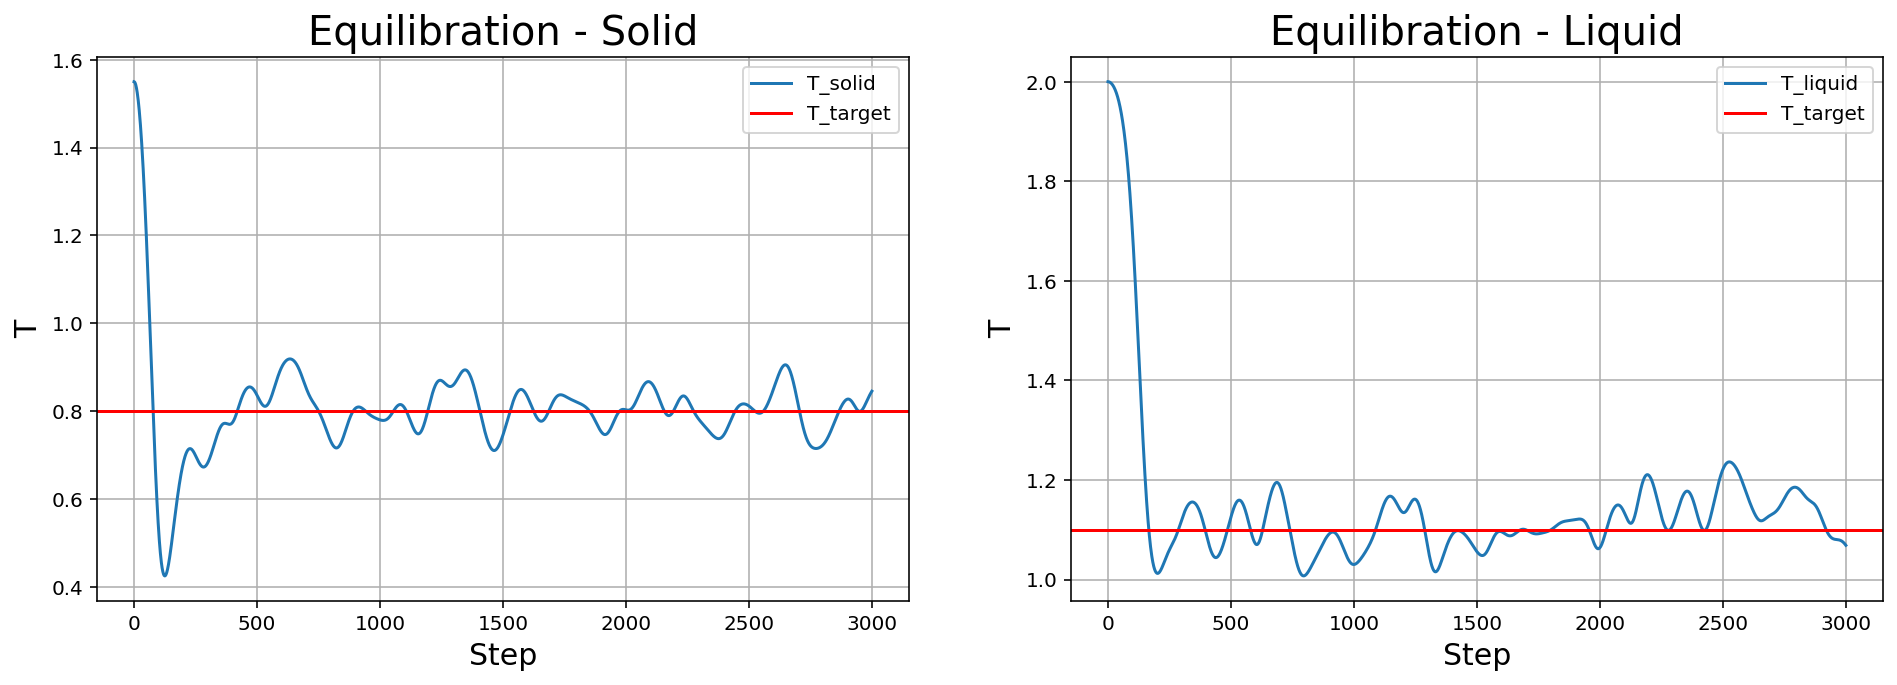

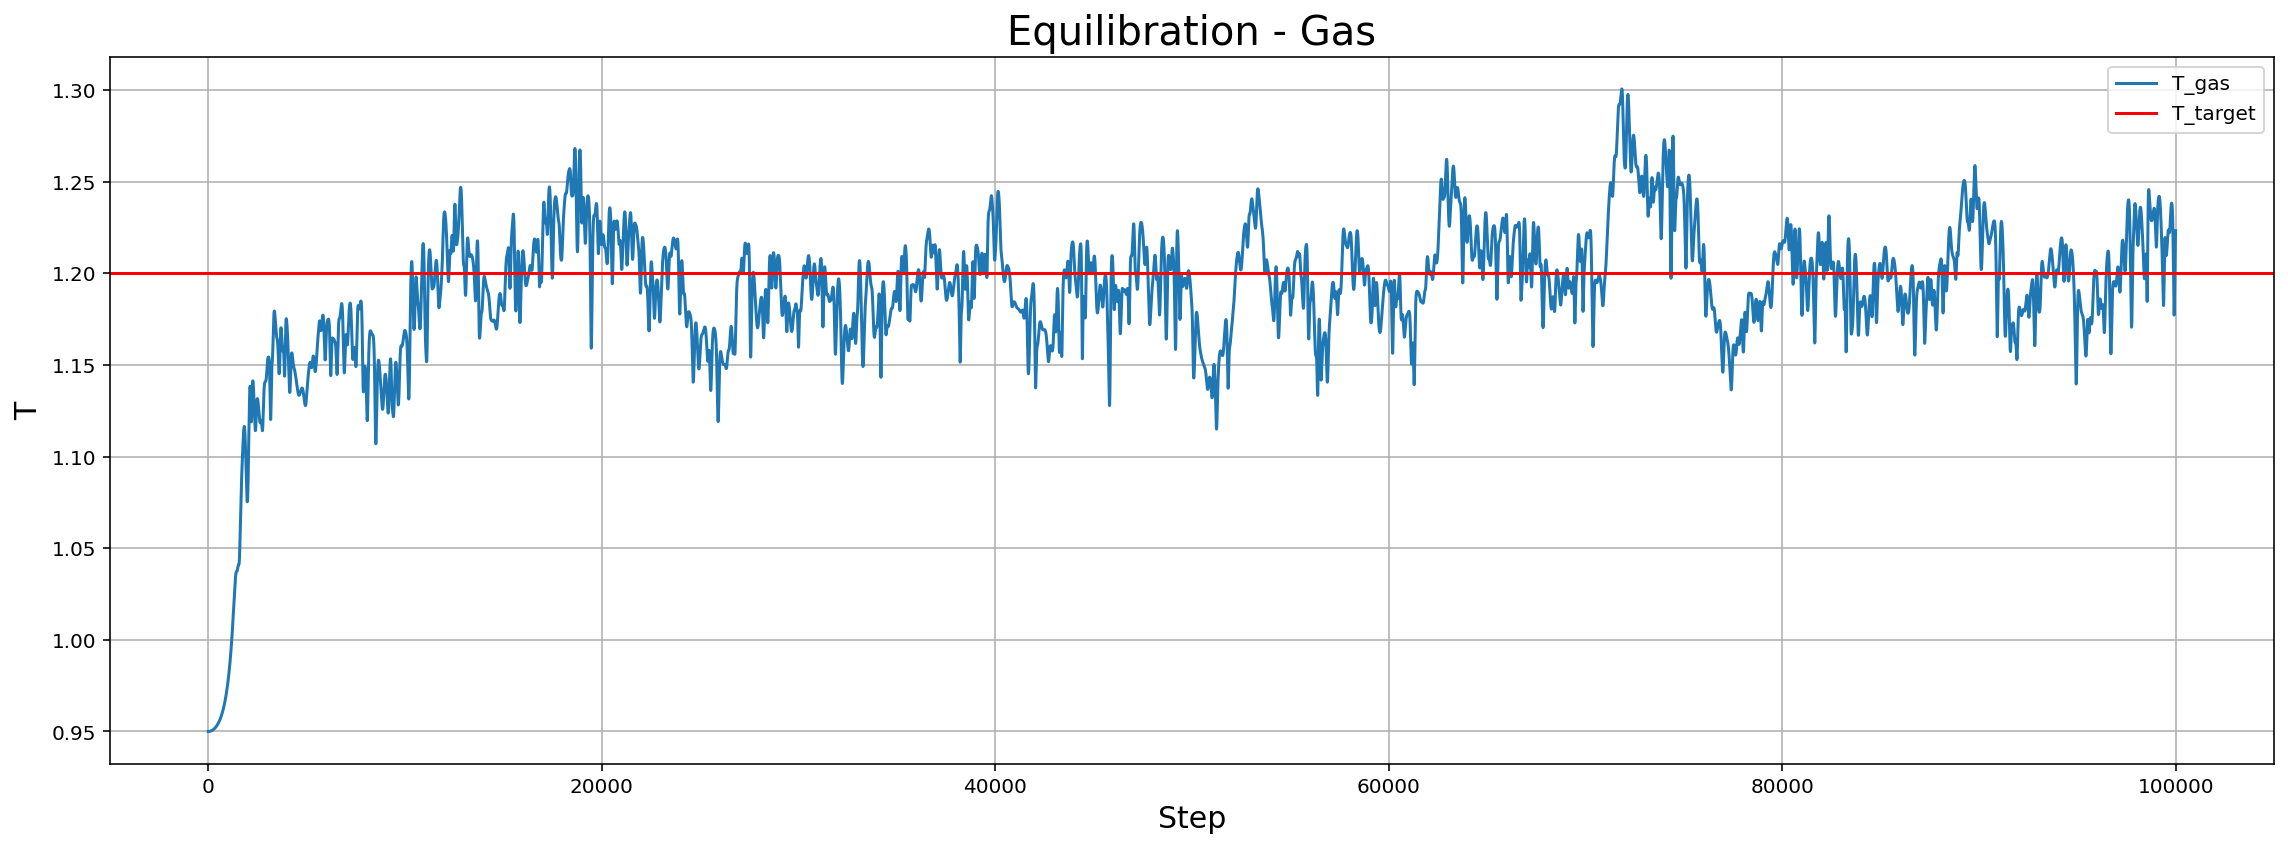

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format='retina'

blk = np.loadtxt('MDNVE_MCNVT/Data/equilibration_solid.dat', dtype=int, usecols=0)
T_solid = np.loadtxt('MDNVE_MCNVT/Data/equilibration_solid.dat', dtype=float, usecols=1)
T_liquid = np.loadtxt('MDNVE_MCNVT/Data/equilibration_liquid.dat', dtype=float, usecols=1)

fig, ax = plt.subplots(1,2,figsize=(16,5))
ax[0].plot(blk, T_solid, label='T_solid')
ax[0].axhline(0.8, color='red', label='T_target')
ax[0].set_xlabel('Step', size=15)
ax[0].set_ylabel('T', size=15)
ax[0].set_title('Equilibration - Solid', size=20)
ax[0].grid()
ax[0].legend()
ax[1].plot(blk, T_liquid, label='T_liquid')
ax[1].axhline(1.1,0, 3000, color='red', label='T_target')
ax[1].set_xlabel('Step', size=15)
ax[1].set_ylabel('T', size=15)
ax[1].set_title('Equilibration - Liquid', size=20)
ax[1].grid()
ax[1].legend()

blk = np.loadtxt('MDNVE_MCNVT/Data/equilibration_gas.dat', dtype=int, usecols=0)
T_gas = np.loadtxt('MDNVE_MCNVT/Data/equilibration_gas.dat', dtype=float, usecols=1)

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(blk, T_gas, label='T_gas')
ax.axhline(1.2, color='red', label='T_target')
ax.set_xlabel('Step', size=15)
ax.set_ylabel('T', size=15)
ax.set_title('Equilibration - Gas', size=20)
ax.legend()
ax.grid()
fig.tight_layout()

Per il sistema solido e liquido è necessario impostare una temperatura di partenza più alta della $T_{target}$, mentre per il gas si parte da una temperatura più bassa. In particolare è stato necessario impostare le temperature di partenza come indicato di seguito:
- $T_{solid} = 1.55$
- $T_{liquid} = 2.00$
- $T_{solid} = 0.95$

Inoltre, per solido e liquido il sistema si può considerare equilibrato dopo $1000$ passi, mentre nel caso del gas sono necessari almeno $20000$ passi. Ciò è dovuto al fatto che per tutte le simulazioni è stato scelto lo stesso passo $\delta t$. Tuttavia, dato che il gas è molto rarefatto, sono necessari più passi un numero tale di interazioni per permettere l'equilibriazione.

Una volta che il sistema si trova all'equilibrio, ripartiamo dalla configurazione raggiunta ed estraiamo le grandezze fisiche richieste dall'esercizio.

#### Fase SOLIDA

Le medie presentate di seguito sono state calcolate su $10^{4}$ dati divisi in $100$ blocchi.

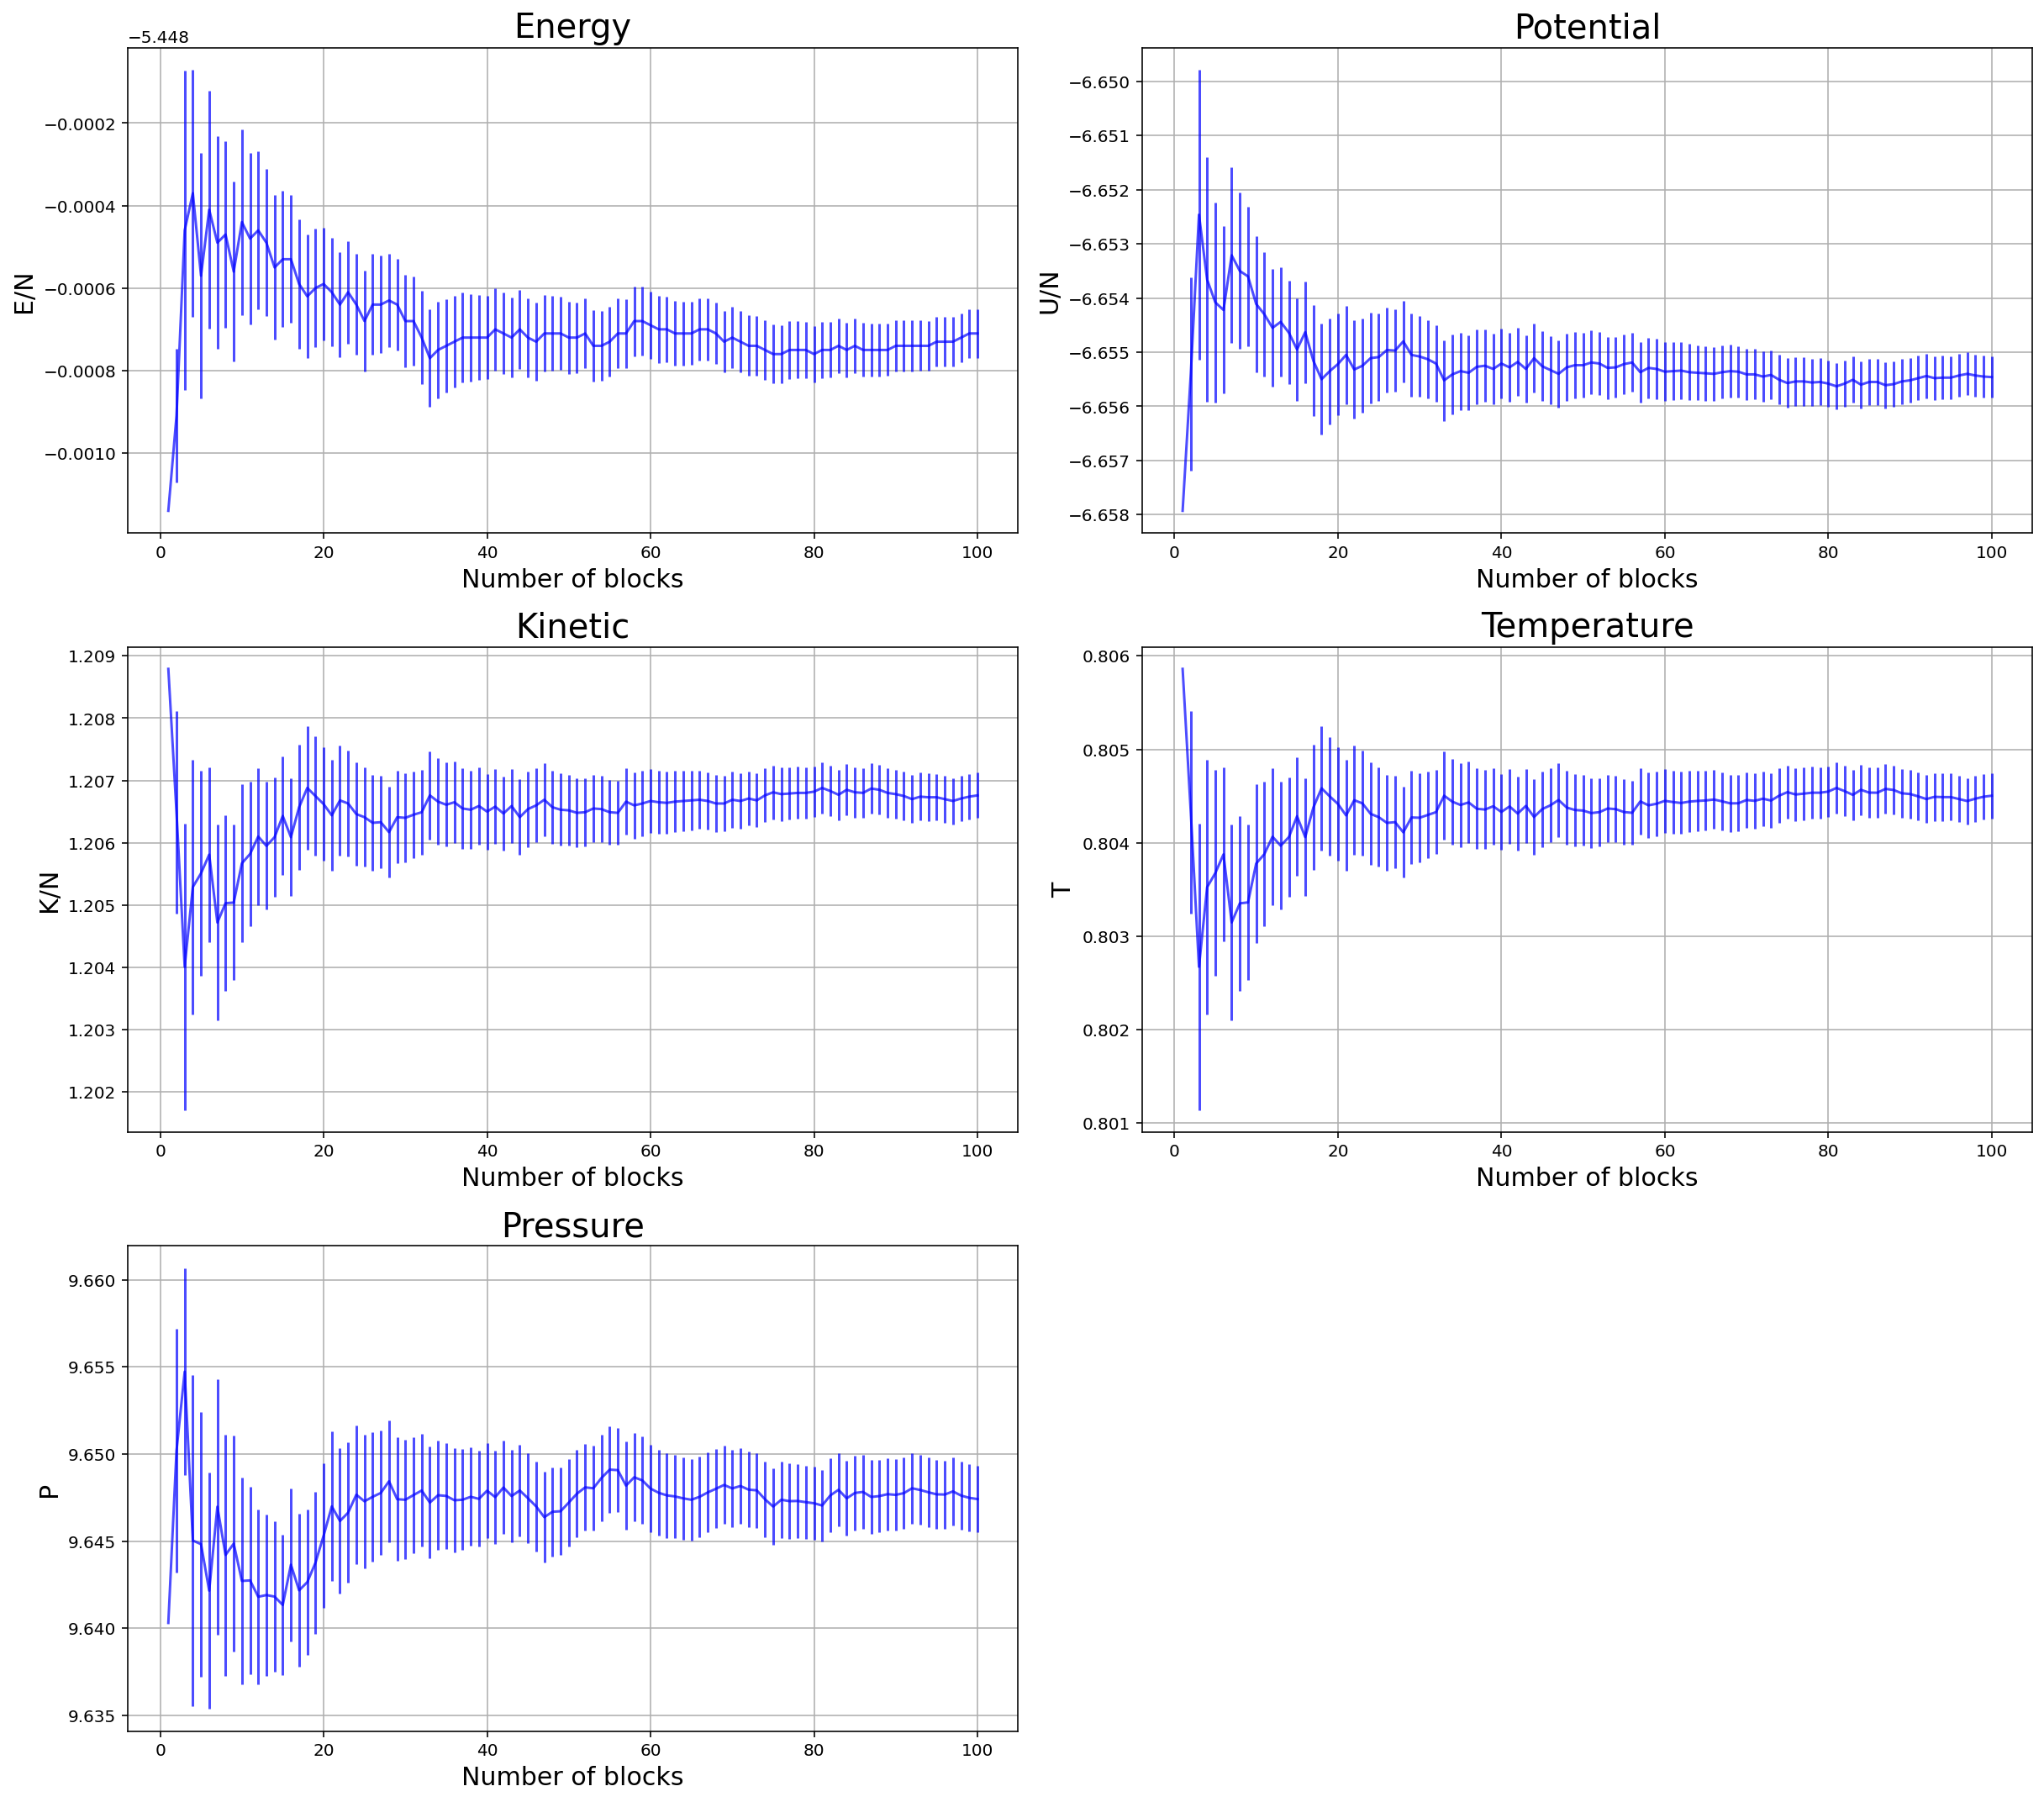

In [2]:
blk = np.loadtxt('MDNVE_MCNVT/Data/output_ekin_solid.dat', dtype=int, usecols=0)

Energy = np.loadtxt('MDNVE_MCNVT/Data/output_etot_solid.dat', dtype=float, usecols=2)
sigma_energy = np.loadtxt('MDNVE_MCNVT/Data/output_etot_solid.dat', dtype=float, usecols=3)
Potential = np.loadtxt('MDNVE_MCNVT/Data/output_epot_solid.dat', dtype=float, usecols=2)
sigma_pot = np.loadtxt('MDNVE_MCNVT/Data/output_epot_solid.dat', dtype=float, usecols=3)
Kinetic = np.loadtxt('MDNVE_MCNVT/Data/output_ekin_solid.dat', dtype=float, usecols=2)
sigma_kin = np.loadtxt('MDNVE_MCNVT/Data/output_ekin_solid.dat', dtype=float, usecols=3)
Temperature = np.loadtxt('MDNVE_MCNVT/Data/output_temp_solid.dat', dtype=float, usecols=2)
sigma_t = np.loadtxt('MDNVE_MCNVT/Data/output_temp_solid.dat', dtype=float, usecols=3)
Pressure = np.loadtxt('MDNVE_MCNVT/Data/output_p_solid.dat', dtype=float, usecols=2)
sigma_p = np.loadtxt('MDNVE_MCNVT/Data/output_p_solid.dat', dtype=float, usecols=3)

fig, ax = plt.subplots(3,2, figsize=(17,15))
ax[0][0].errorbar(blk, Energy, yerr=sigma_energy, color='b', alpha=0.7)
ax[0][0].set_title('Energy', size=20)
ax[0][0].set_xlabel('Number of blocks',size=15)
ax[0][0].set_ylabel('E/N',size=15)
ax[0][0].grid()
ax[0][1].errorbar(blk, Potential, yerr=sigma_pot, color='b', alpha=0.7)
ax[0][1].set_title('Potential', size=20)
ax[0][1].set_xlabel('Number of blocks',size=15)
ax[0][1].set_ylabel('U/N',size=15)
ax[0][1].grid()
ax[1][0].errorbar(blk, Kinetic, yerr=sigma_kin, color='b', alpha=0.7)
ax[1][0].set_title('Kinetic', size=20)
ax[1][0].set_xlabel('Number of blocks',size=15)
ax[1][0].set_ylabel('K/N',size=15)
ax[1][0].grid()
ax[1][1].errorbar(blk, Temperature, yerr=sigma_t, color='b', alpha=0.7)
ax[1][1].set_title('Temperature', size=20)
ax[1][1].set_xlabel('Number of blocks',size=15)
ax[1][1].set_ylabel('T',size=15)
ax[1][1].grid()
ax[2][0].errorbar(blk, Pressure, yerr=sigma_p, color='b', alpha=0.7)
ax[2][0].set_xlabel('Number of blocks',size=15)
ax[2][0].set_title('Pressure', size=20)
ax[2][0].set_ylabel('P',size=15)
ax[2][0].grid()
fig.delaxes(ax[2][1])
fig.tight_layout()

Dalla simulazione riportata possiamo osservare che l'energia totale è negativa in quanto il sistema, solido, è molto legato e domani l'energia potenziale attrattiva tra le molecole invece che l'energia cinetica. Di conseguenza la pressione è maggiore.

#### Fase LIQUIDA

Come per la fase solida sono stati prodotti $10^{4}$ dati divisi in $100$ blocchi

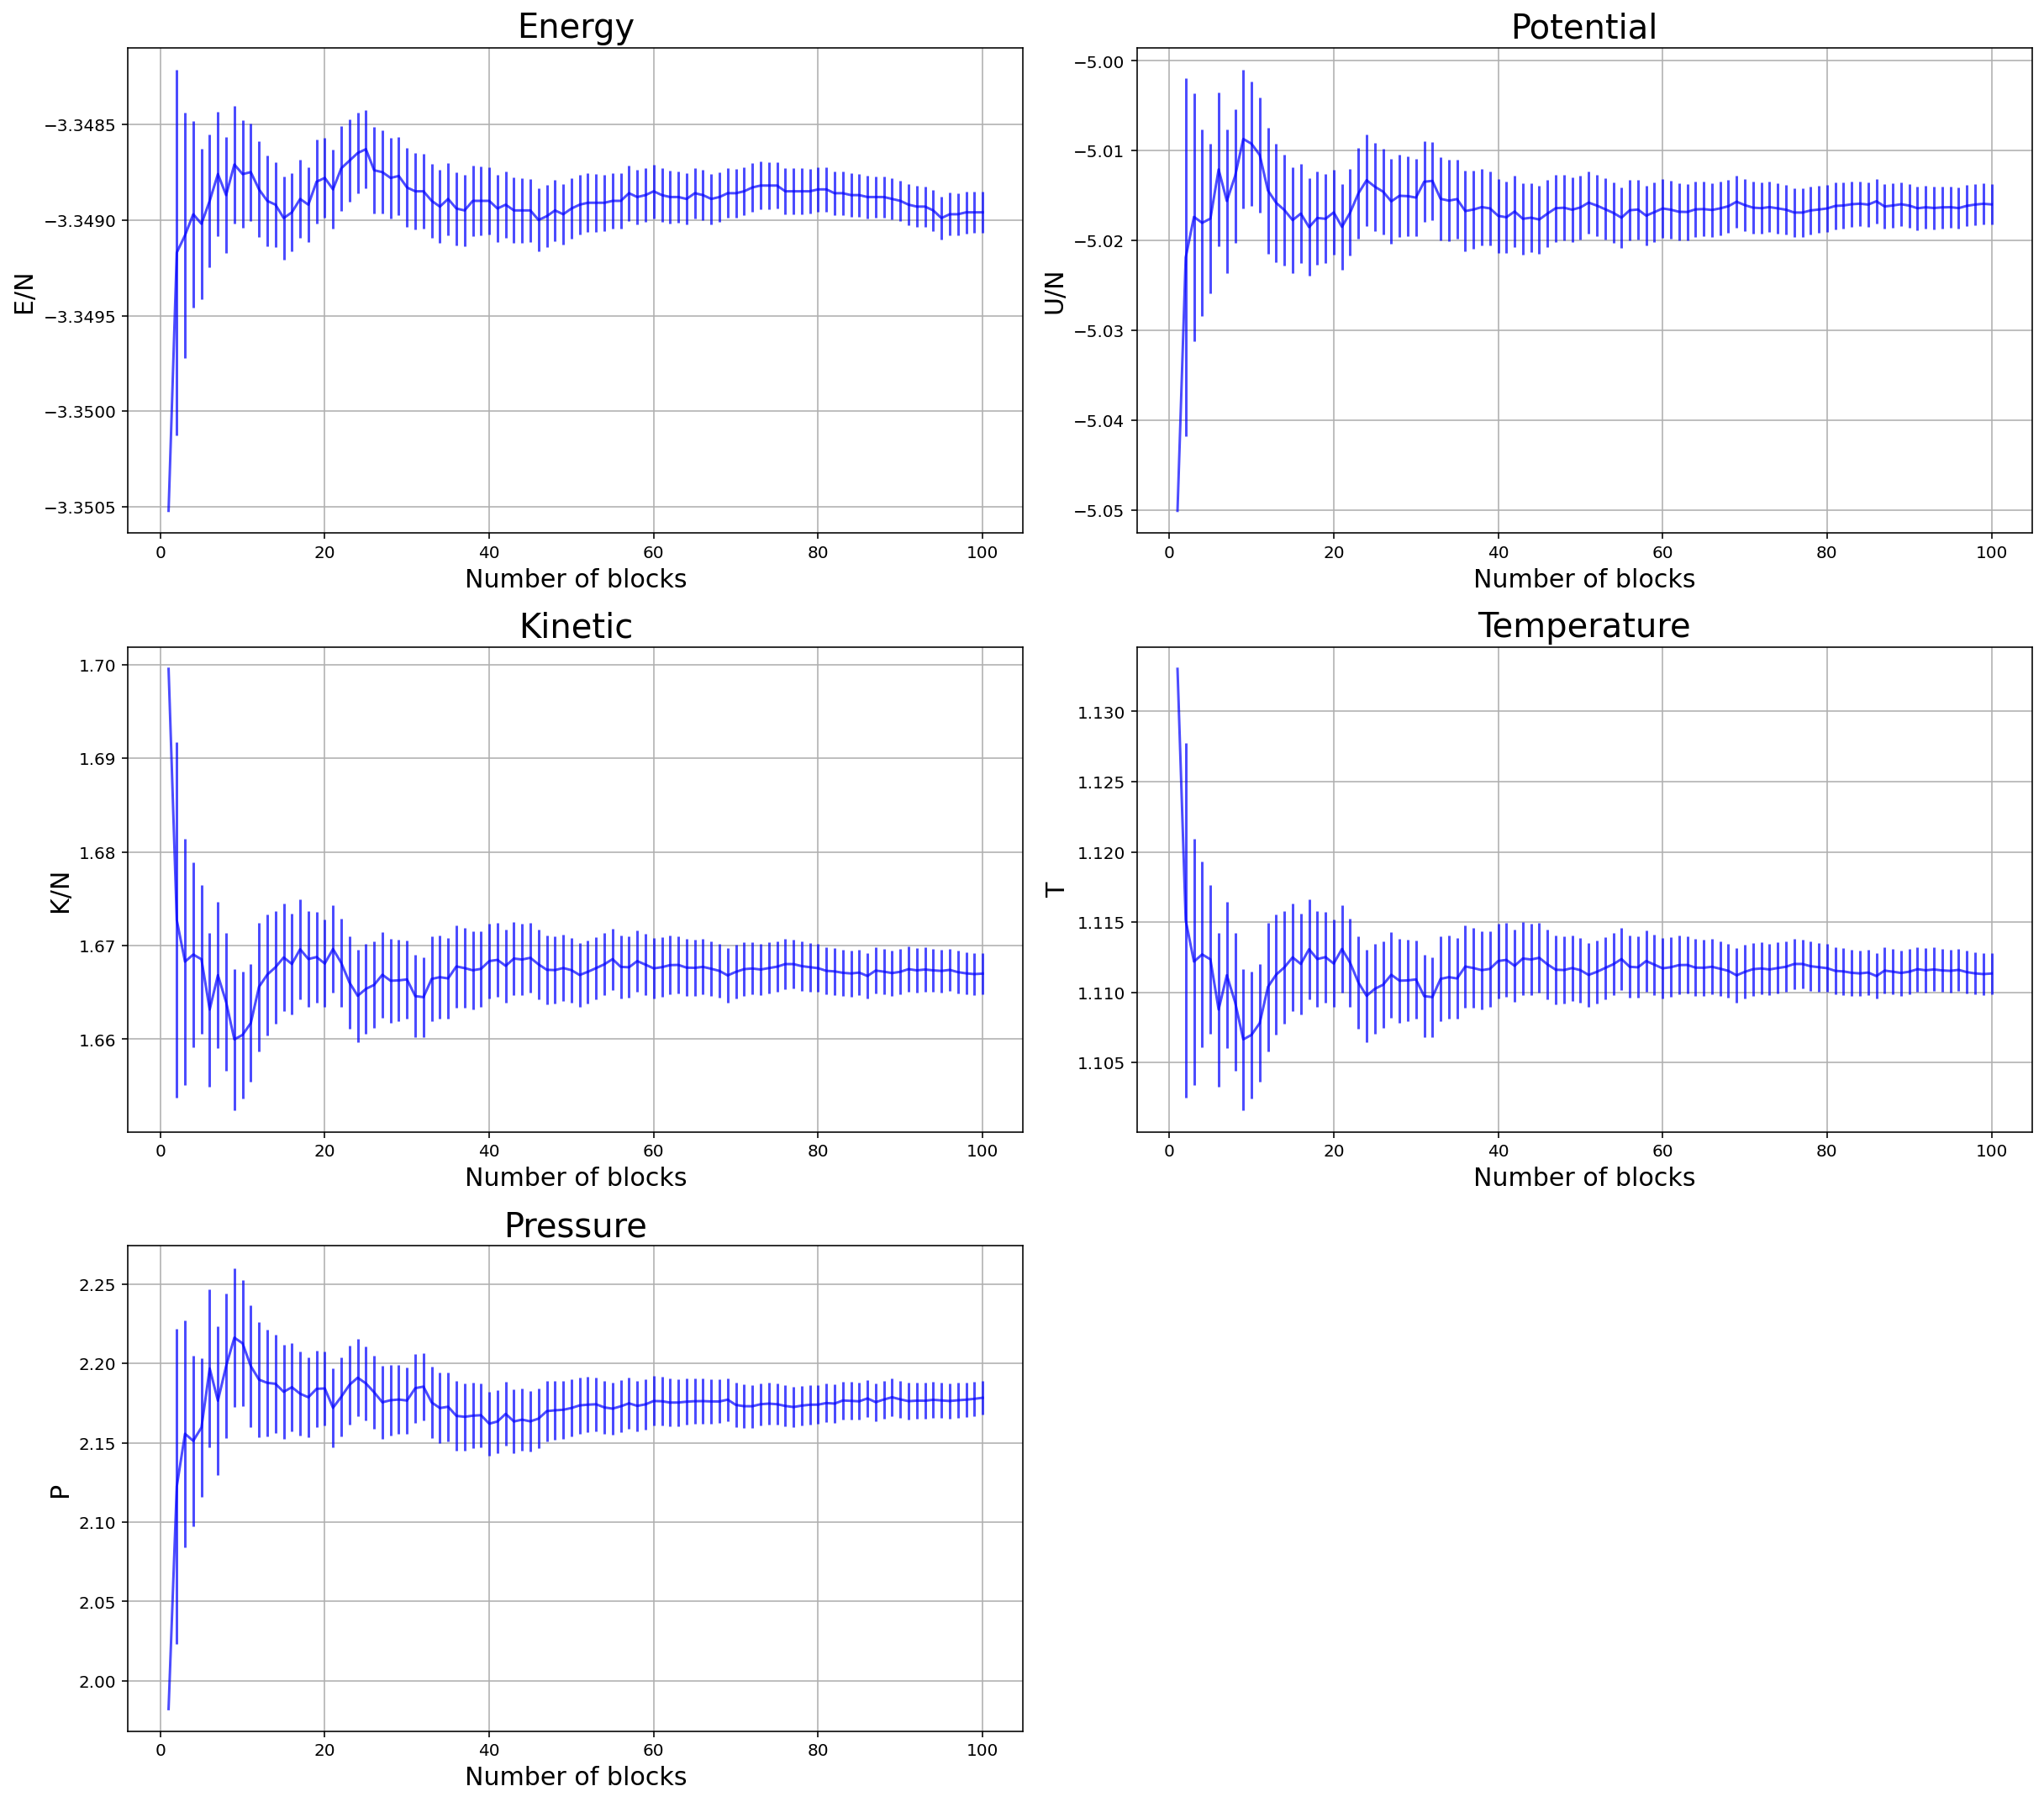

In [3]:
blk = np.loadtxt('MDNVE_MCNVT/Data/output_ekin_liquid.dat', dtype=int, usecols=0)

Energy = np.loadtxt('MDNVE_MCNVT/Data/output_etot_liquid.dat', dtype=float, usecols=2)
sigma_energy = np.loadtxt('MDNVE_MCNVT/Data/output_etot_liquid.dat', dtype=float, usecols=3)
Potential = np.loadtxt('MDNVE_MCNVT/Data/output_epot_liquid.dat', dtype=float, usecols=2)
sigma_pot = np.loadtxt('MDNVE_MCNVT/Data/output_epot_liquid.dat', dtype=float, usecols=3)
Kinetic = np.loadtxt('MDNVE_MCNVT/Data/output_ekin_liquid.dat', dtype=float, usecols=2)
sigma_kin = np.loadtxt('MDNVE_MCNVT/Data/output_ekin_liquid.dat', dtype=float, usecols=3)
Temperature = np.loadtxt('MDNVE_MCNVT/Data/output_temp_liquid.dat', dtype=float, usecols=2)
sigma_t = np.loadtxt('MDNVE_MCNVT/Data/output_temp_liquid.dat', dtype=float, usecols=3)
Pressure = np.loadtxt('MDNVE_MCNVT/Data/output_p_liquid.dat', dtype=float, usecols=2)
sigma_p = np.loadtxt('MDNVE_MCNVT/Data/output_p_liquid.dat', dtype=float, usecols=3)

fig, ax = plt.subplots(3,2, figsize=(17,15))
ax[0][0].errorbar(blk, Energy, yerr=sigma_energy, color='b', alpha=0.7)
ax[0][0].set_title('Energy', size=20)
ax[0][0].set_xlabel('Number of blocks',size=15)
ax[0][0].set_ylabel('E/N',size=15)
ax[0][0].grid()
ax[0][1].errorbar(blk, Potential, yerr=sigma_pot, color='b', alpha=0.7)
ax[0][1].set_title('Potential', size=20)
ax[0][1].set_xlabel('Number of blocks',size=15)
ax[0][1].set_ylabel('U/N',size=15)
ax[0][1].grid()
ax[1][0].errorbar(blk, Kinetic, yerr=sigma_kin, color='b', alpha=0.7)
ax[1][0].set_title('Kinetic', size=20)
ax[1][0].set_xlabel('Number of blocks',size=15)
ax[1][0].set_ylabel('K/N',size=15)
ax[1][0].grid()
ax[1][1].errorbar(blk, Temperature, yerr=sigma_t, color='b', alpha=0.7)
ax[1][1].set_title('Temperature', size=20)
ax[1][1].set_xlabel('Number of blocks',size=15)
ax[1][1].set_ylabel('T',size=15)
ax[1][1].grid()
ax[2][0].errorbar(blk, Pressure, yerr=sigma_p, color='b', alpha=0.7)
ax[2][0].set_xlabel('Number of blocks',size=15)
ax[2][0].set_title('Pressure', size=20)
ax[2][0].set_ylabel('P',size=15)
ax[2][0].grid()
fig.delaxes(ax[2][1])
fig.tight_layout()

Rispetto alla fase solida osserviamo che i valori dell'energia sono più elevati in quanto è aumentata l'energia cinetica (e quindi la temperatura). La pressione, come era possibile prevedere, è diminuita.

#### Fase gassosa

Ancora, sono stati prodotti $10^{4}$ dati divisi in $100$ blocchi.

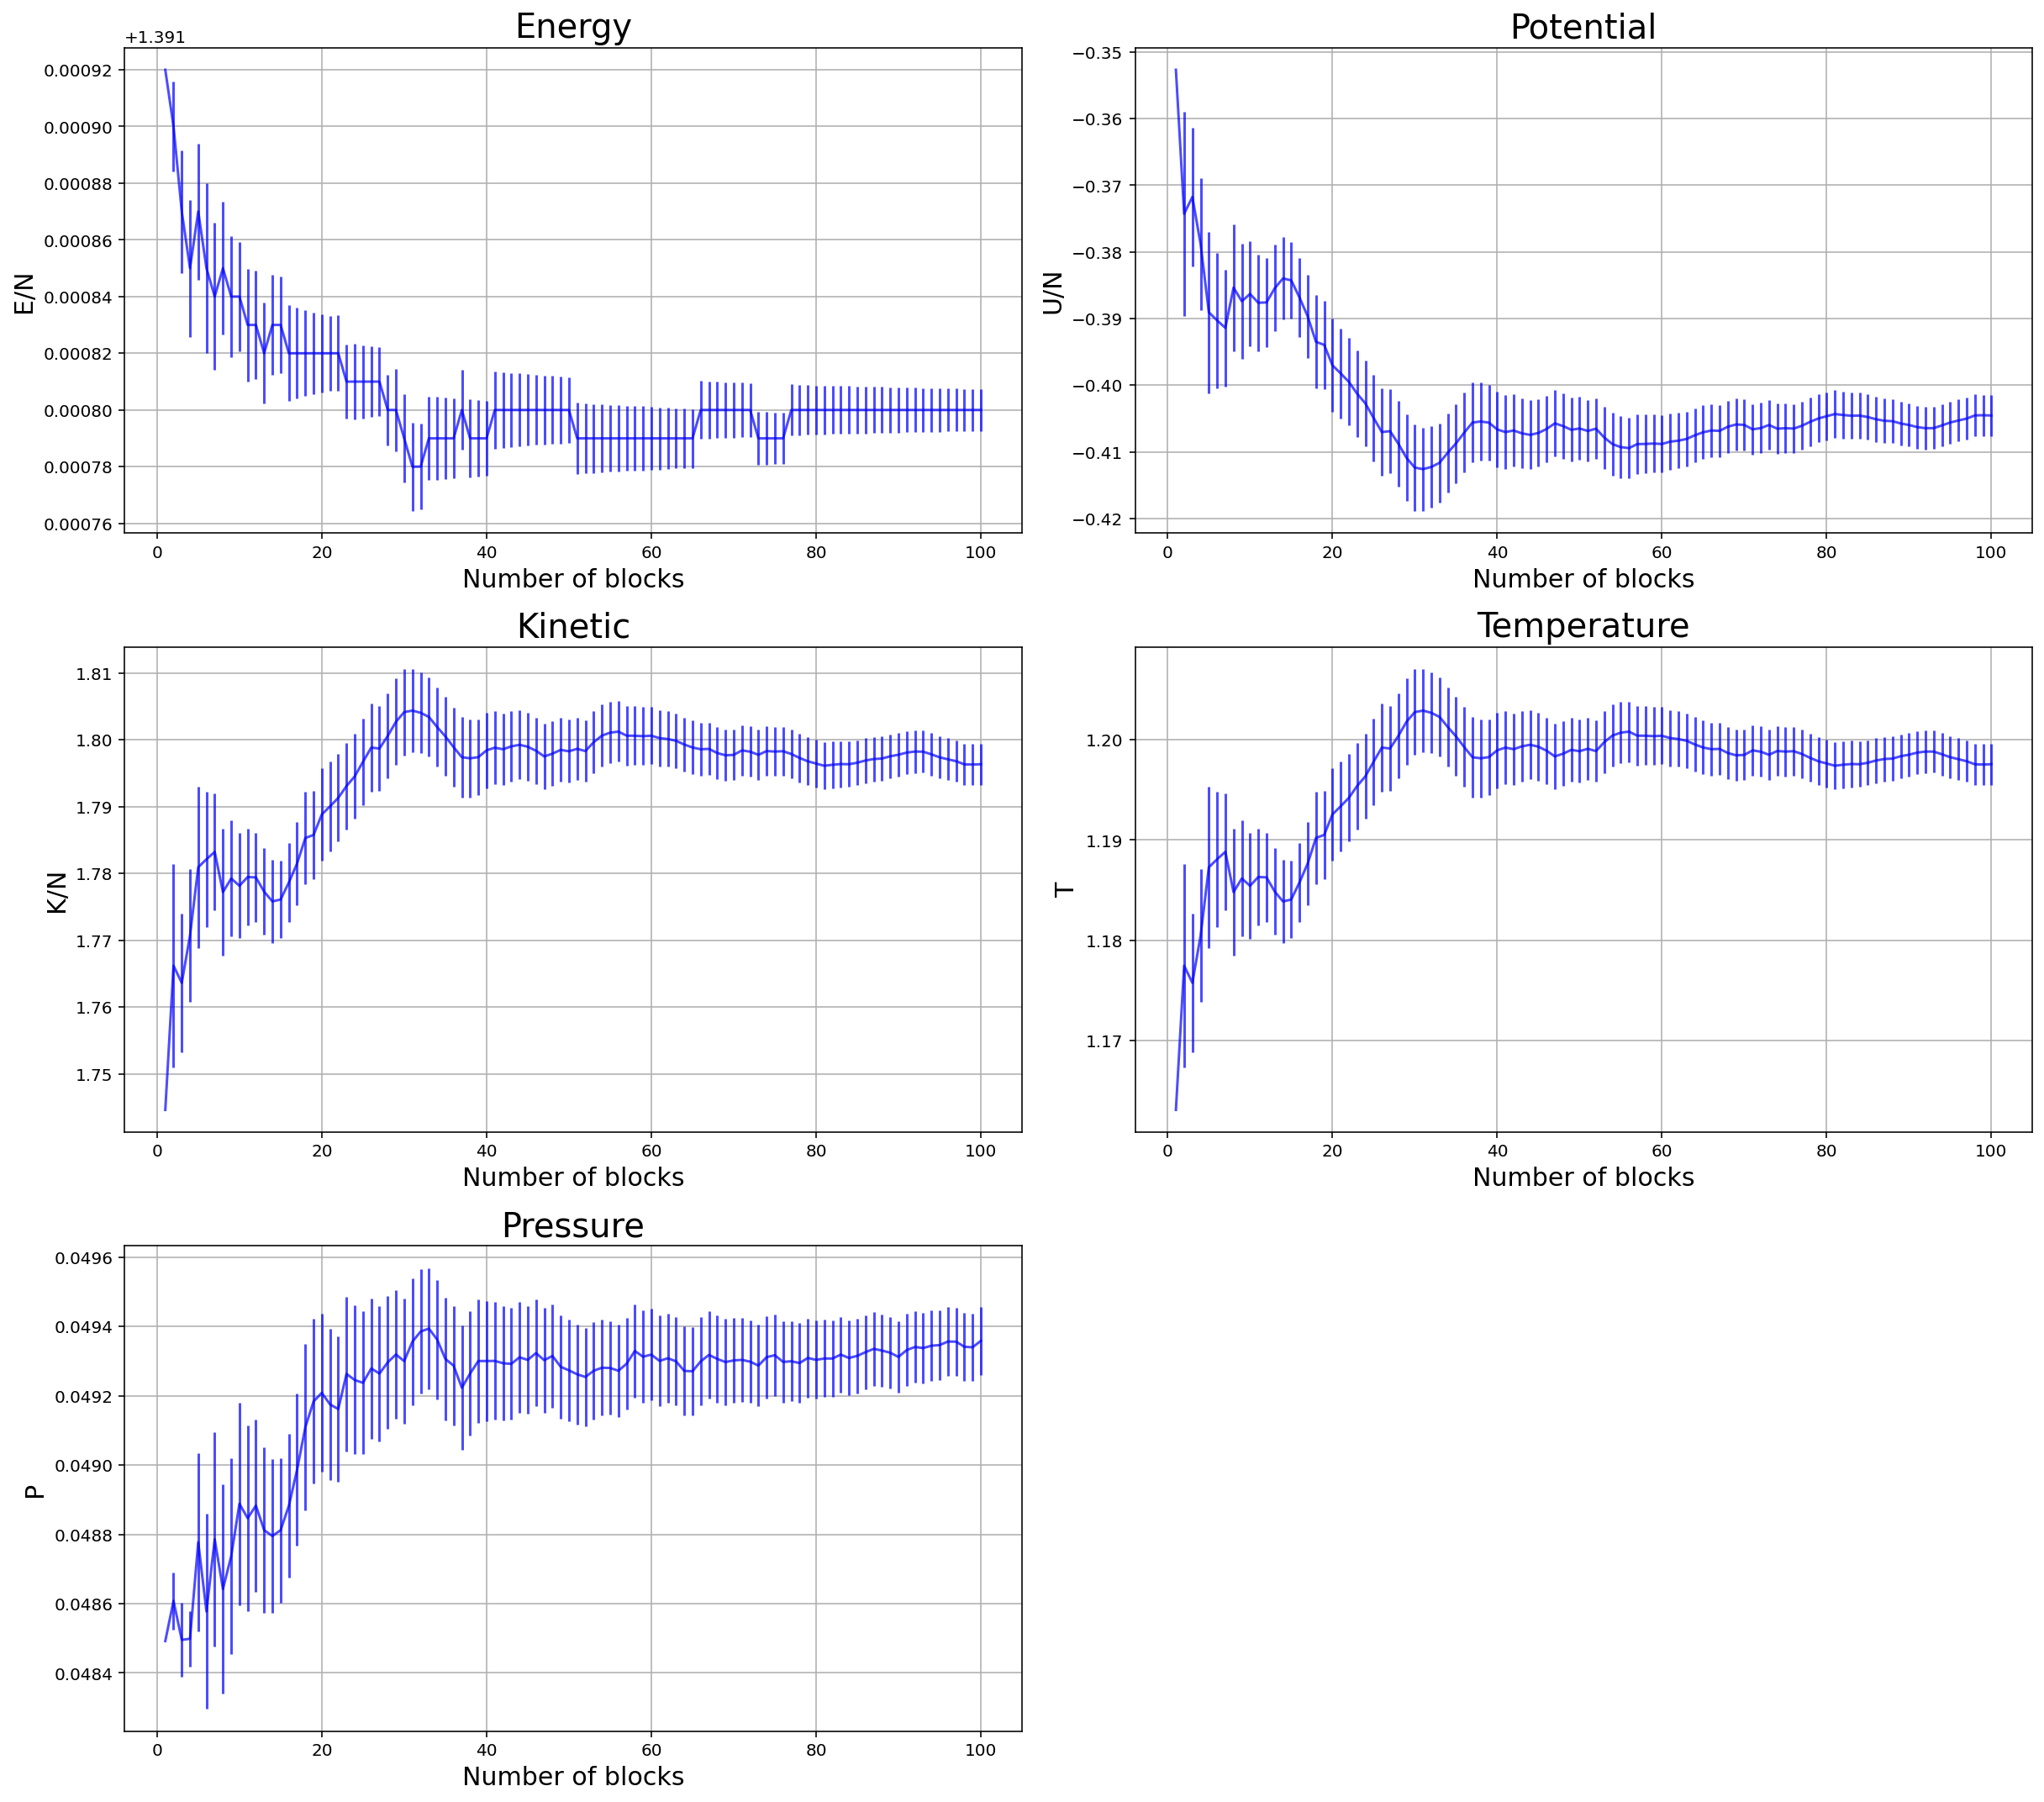

In [4]:
blk = np.loadtxt('MDNVE_MCNVT/Data/output_ekin_gas.dat', dtype=int, usecols=0)

Energy = np.loadtxt('MDNVE_MCNVT/Data/output_etot_gas.dat', dtype=float, usecols=2)
sigma_energy = np.loadtxt('MDNVE_MCNVT/Data/output_etot_gas.dat', dtype=float, usecols=3)
Potential = np.loadtxt('MDNVE_MCNVT/Data/output_epot_gas.dat', dtype=float, usecols=2)
sigma_pot = np.loadtxt('MDNVE_MCNVT/Data/output_epot_gas.dat', dtype=float, usecols=3)
Kinetic = np.loadtxt('MDNVE_MCNVT/Data/output_ekin_gas.dat', dtype=float, usecols=2)
sigma_kin = np.loadtxt('MDNVE_MCNVT/Data/output_ekin_gas.dat', dtype=float, usecols=3)
Temperature = np.loadtxt('MDNVE_MCNVT/Data/output_temp_gas.dat', dtype=float, usecols=2)
sigma_t = np.loadtxt('MDNVE_MCNVT/Data/output_temp_gas.dat', dtype=float, usecols=3)
Pressure = np.loadtxt('MDNVE_MCNVT/Data/output_p_gas.dat', dtype=float, usecols=2)
sigma_p = np.loadtxt('MDNVE_MCNVT/Data/output_p_gas.dat', dtype=float, usecols=3)

fig, ax = plt.subplots(3,2, figsize=(17,15))
ax[0][0].errorbar(blk, Energy, yerr=sigma_energy, color='b', alpha=0.7)
ax[0][0].set_title('Energy', size=20)
ax[0][0].set_xlabel('Number of blocks',size=15)
ax[0][0].set_ylabel('E/N',size=15)
ax[0][0].grid()
ax[0][1].errorbar(blk, Potential, yerr=sigma_pot, color='b', alpha=0.7)
ax[0][1].set_title('Potential', size=20)
ax[0][1].set_xlabel('Number of blocks',size=15)
ax[0][1].set_ylabel('U/N',size=15)
ax[0][1].grid()
ax[1][0].errorbar(blk, Kinetic, yerr=sigma_kin, color='b', alpha=0.7)
ax[1][0].set_title('Kinetic', size=20)
ax[1][0].set_xlabel('Number of blocks',size=15)
ax[1][0].set_ylabel('K/N',size=15)
ax[1][0].grid()
ax[1][1].errorbar(blk, Temperature, yerr=sigma_t, color='b', alpha=0.7)
ax[1][1].set_title('Temperature', size=20)
ax[1][1].set_xlabel('Number of blocks',size=15)
ax[1][1].set_ylabel('T',size=15)
ax[1][1].grid()
ax[2][0].errorbar(blk, Pressure, yerr=sigma_p, color='b', alpha=0.7)
ax[2][0].set_xlabel('Number of blocks',size=15)
ax[2][0].set_title('Pressure', size=20)
ax[2][0].set_ylabel('P',size=15)
ax[2][0].grid()
fig.delaxes(ax[2][1])
fig.tight_layout()

L'energia totale è diventata positiva, segno che il contributo dell'energia cinetica è diventato dominante sul potenziale. Tuttavia osserviamo un comportamento a scatti dei valori medi dell'energia. Ciò è dovuto al fatto che i dati variano su scale decimali che non sono state salvate nel file. Per questo, abbiamo prodotto un nuovo file con più cifre decimali che qui riportiamo per osservare l'andamento reale dell'energia totale.

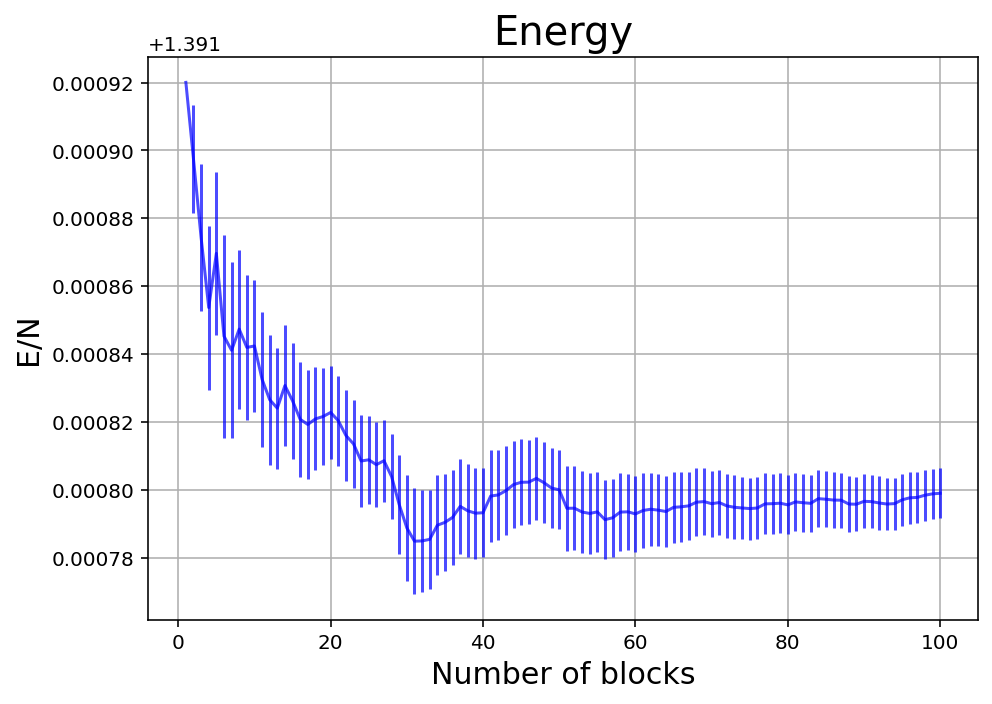

In [5]:
blk = np.loadtxt('MDNVE_MCNVT/Data/output_ekin_gas.dat', dtype=int, usecols=0)

Energy = np.loadtxt('MDNVE_MCNVT/Data/output_etot_gas_digits.dat', dtype=float, usecols=2)
sigma_energy = np.loadtxt('MDNVE_MCNVT/Data/output_etot_gas_digits.dat', dtype=float, usecols=3)

fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(blk, Energy, yerr=sigma_energy, color='b', alpha=0.7)
ax.set_title('Energy', size=20)
ax.set_xlabel('Number of blocks',size=15)
ax.set_ylabel('E/N',size=15)
ax.grid()
fig.tight_layout()